In [1]:
import os
import matplotlib.pyplot as plt
import control as ct
import numpy as np

In [2]:
def forwardeuler(dz,z,step):
    z = z + step*dz
    return z

In [3]:
def voigtmodel(Dd,v2,x2,deltat):
    Kd = 750 
    x2 = forwardeuler(v2,x2,deltat)
    F2 = v2*Dd + x2*Kd
    return F2,x2

In [4]:
def POPC(Eprev, v2,v2pre, F2, alphapre, deltat):
    Eobs = Eprev + (v2*F2 + alphapre*(v2pre**2))*deltat
    if Eobs < 0:
        alpha = -Eobs/(v2**2)
    else:
        alpha = 0
    F1 = F2 + alpha*v2
    return F1,Eobs,alpha

In [5]:
deltat = 0.0001
tf = 20
ti = 0
n = int(((tf-ti)/deltat)+1)
t = np.linspace(ti,tf,n)

In [6]:
alphaarr = np.zeros(n, dtype = np.float64)
v2arr = np.zeros(n, dtype = np.float64)
x2arr = np.zeros(n, dtype = np.float64)
F2arr = np.zeros(n, dtype = np.float64)
F1arr = np.zeros(n, dtype = np.float64)
Estor = np.zeros(n, dtype = np.float64)
a = 1
v2arr = a*np.cos(t)

PDd = 50*np.ones(int(n/4)+1,dtype = np.float64)
NDd = -100*np.ones(int(3*n/4),dtype = np.float64)
Ddarr = [PDd,NDd]
Dd = np.concatenate((PDd,NDd))

In [7]:
for i in range(1,n):
    x2arr[0] = 0 
    v2 = v2arr[i]
    v2pre = v2arr[i-1]
    x2 = x2arr[i-1]
    Eprev = Estor[i-1]
    alphapre = alphaarr[i-1]
    F2,x2arr[i] = voigtmodel(Dd[i],v2,x2,deltat)
    F1arr[i], Estor[i],alphaarr[i] = POPC(Eprev, v2,v2pre, F2, alphapre, deltat)
    F2arr[i] = F2

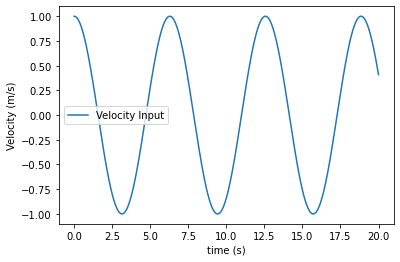

In [8]:
plt.figure()
plt.xlabel("time (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(t,v2arr,label = 'Velocity Input')
plt.savefig('Figures_impedancecausal/velinput',format = 'pdf')
plt.legend()

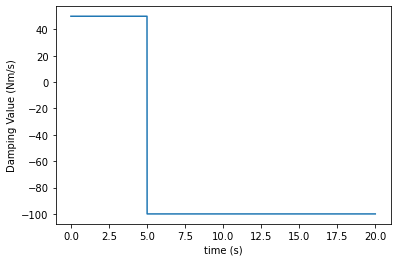

In [9]:
plt.figure()
plt.xlabel("time (s)")
plt.ylabel("Damping Value (Nm/s)")
plt.plot(t,Dd)
plt.savefig('Figures_impedancecausal/variabledamping',format = 'pdf')


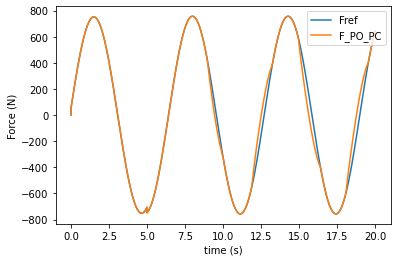

In [10]:

plt.figure(1)
plt.xlabel("time (s)")
plt.ylabel("Force (N)")
plt.plot(t,F2arr,label = 'Fref')
plt.plot(t,F1arr,label = 'F_PO_PC')
plt.savefig('Figures_impedancecausal/distortedforce',format = 'pdf')
plt.legend()

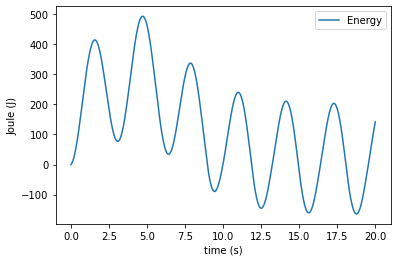

In [11]:
plt.figure(2)
plt.xlabel("time (s)")
plt.ylabel("Joule (J)")
plt.plot(t,Estor,label = 'Energy')
plt.savefig('Figures_impedancecausal/energy',format = 'pdf')
plt.legend()

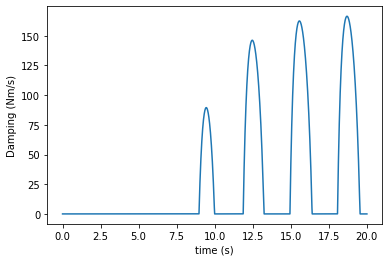

In [12]:
plt.figure(3)
plt.xlabel("time (s)")
plt.ylabel("Damping (Nm/s)")
plt.plot(t,alphaarr,label = 'Damping alpha')
plt.savefig('Figures_impedancecausal/alpha',format = 'pdf')